**AI for Generating Recipes**

**What?**

With the closing of many restaurants during the pandemic I’ve spent hours searching various websites looking for the next recipe to cook in my kitchen. While I wait for my water to boil, I would watch YouTube videos of people using AI to create original poems, so I thought - why not recipes?! For my project this semester, I would like to create an AI that generates recipes given a list of ingredients I have in my kitchen. 

**How?**

I did not start this project by myself, but followed a tutorial by Oleksii Trekhleb, a Software Engineer at Uber. This is my version for a “Hello World”. The project includes a Long Short-Term Memory (LSTM) Recurrent Neural Network that is trained with over 250,000+ recipes. (I chose a different database than the one Oleksii uses with 100,000+ recipes). 

RNN’s are most commonly used for natural language processing because they can store some context of the sequence in internal memory. This becomes useful in our use case: if the first word of the sequence was *Preheat*, the RNN may suggest the next word to be oven (instead of *microwave*) because *Preheat* is already inside the internal memory and we’ve learned through training the common context of this word. This can also be done on a character-level, which is what I used for my project.

LSTM is used because we want to understand as much of the previous context in order to suggest the next word or character to use. A neural network’s ability to understand long range dependencies in data is important for sentence structures. 
I converted my Pandas dataset to TensorFlow and used TensorFlow’s Keras API to build my LSTM RNN model. After cleaning my dataset, tokenizing by characters, padding my sequences, and building my Sequential Embedded LSTM model, I  then split my dataset into 64 batches, and trained my model into 20 epoches, with 200 steps for each epoch. We calculated loss with our training data using a Keras optimizer and Sparse Categorical Cross Entropy. It took about 3 days to train on my personal computer and here is the improvement we got to:
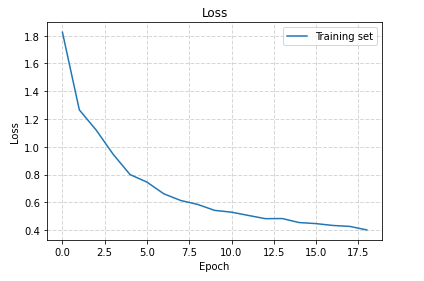

Here is a generated Recipe:

>Attempt: "B" + 1.0
>-----------------------------------
>📗 Bjuice cookies
>
>🥕
>- butter
>- eggs
>- shulk wine vinegar
>- egg
>- olive oil
>- semi-sweet peas
>- chocolate sauce
>- frozen chopped pickling salt

>📝
>- place bread fuffining pieces
>- in a small bowl 
>- combine butter in large pie pan 
>- alternately away from pan
>- cover with laffle mixture in each prepare
>- remove from then sides and serve immediately
>- mix the soup in the bruscheets with nonstick cooking spray
>- microwave for 12 minutes or until softened
>- dein your meat

**What’s Next:**

Our model needs longer time to train, as seen by the poor grammar and English in our example recipes. Next, I hope to:
1. Train the model longer
2. Eliminate duplicates in the ingredients section
3. Connect the Ingredients to the Instructions: ensure that the items mentioned in the instructions section are the only items in the ingredients list. 


Tuturial: https://www.kdnuggets.com/2020/07/generating-cooking-recipes-using-tensorflow.html
 
Dataset: 
Inlcudes 250,000+ recipes with indredient porportions
https://www.kaggle.com/shuyangli94/food-com-recipes-and-user-interactions?select=RAW_recipes.csv

In [1]:
# Packages for training the model and working with the dataset.
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

# Utility/helper packages.
import platform
import time
import pathlib
import os


In [2]:
data_dir = r'C:\Users\MEOW\Dropbox\JupyterProjects'
file_name = data_dir + '\RAW_recipes.csv'
dataset_raw = pd.read_csv(file_name)
dataset_raw.head(35)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8
5,apple a day milk shake,5289,0,1533,1999-12-06,"['15-minutes-or-less', 'time-to-make', 'course...","[160.2, 10.0, 55.0, 3.0, 9.0, 20.0, 7.0]",4,"['combine ingredients in blender', 'cover and ...",NaN,"['milk', 'vanilla ice cream', 'frozen apple ju...",4
6,aww marinated olives,25274,15,21730,2002-04-14,"['15-minutes-or-less', 'time-to-make', 'course...","[380.7, 53.0, 7.0, 24.0, 6.0, 24.0, 6.0]",4,['toast the fennel seeds and lightly crush the...,my italian mil was thoroughly impressed by my ...,"['fennel seeds', 'green olives', 'ripe olives'...",9
7,backyard style barbecued ribs,67888,120,10404,2003-07-30,"['weeknight', 'time-to-make', 'course', 'main-...","[1109.5, 83.0, 378.0, 275.0, 96.0, 86.0, 36.0]",10,['in a medium saucepan combine all the ingredi...,this recipe is posted by request and was origi...,"['pork spareribs', 'soy sauce', 'fresh garlic'...",22
8,bananas 4 ice cream pie,70971,180,102353,2003-09-10,"['weeknight', 'time-to-make', 'course', 'main-...","[4270.8, 254.0, 1306.0, 111.0, 127.0, 431.0, 2...",8,"['crumble cookies into a 9-inch pie plate , or...",NaN,"['chocolate sandwich style cookies', 'chocolat...",6
9,beat this banana bread,75452,70,15892,2003-11-04,"['weeknight', 'time-to-make', 'course', 'main-...","[2669.3, 160.0, 976.0, 107.0, 62.0, 310.0, 138.0]",12,"['preheat oven to 350 degrees', 'butter two 9x...",from ann hodgman's,"['sugar', 'unsalted butter', 'bananas', 'eggs'...",9


In [3]:
def recipe_validate_required_fields(recipe):
    recipe = recipe[1]
    required_keys = ["name", "ingredients", "steps", "n_steps"]

    if recipe.empty:
        return False
    
    for required_key in required_keys:
        if not recipe[required_key]:
            return False
        
        if type(recipe[required_key]) == list and len(recipe[required_key]) == 0:
            return False
    
    return True

dataset_validated = [recipe for recipe in dataset_raw.iterrows() if recipe_validate_required_fields(recipe)]

print('Dataset size BEFORE validation', len(dataset_raw))
print('Dataset size AFTER validation', len(dataset_validated))
print('Number of incomplete recipes', len(dataset_raw) - len(dataset_validated))


Dataset size BEFORE validation 231637
Dataset size AFTER validation 231636
Number of incomplete recipes 1


In [4]:
print(dataset_validated[5][1]["n_steps"])

4


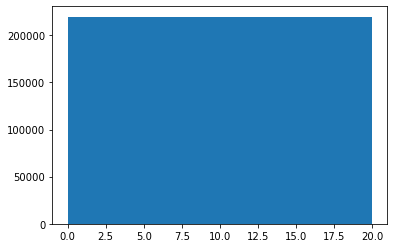

In [5]:
def filter_by_n_steps(recipe):
    recipe = recipe[1]
    
    if recipe["n_steps"] > 10:
        return False
    
    return True    

recipes_steps = []
for recipe in dataset_validated:
    recipes_steps.append(recipe[1]["n_steps"])


plt.hist(recipes_steps, range=(0, 20), bins=1)
plt.show()



In [6]:
dataset_validated = [recipe for recipe in dataset_validated if filter_by_n_steps(recipe)]

print('Dataset size BEFORE filtering Steps', len(dataset_raw))
print('Dataset size AFTER filtering Steps', len(dataset_validated))
print('Number of filtered recipes', len(dataset_raw) - len(dataset_validated))

Dataset size BEFORE filtering Steps 231637
Dataset size AFTER filtering Steps 148914
Number of filtered recipes 82723


In [7]:
STOP_WORD_TITLE = '📗 '
STOP_WORD_INGREDIENTS = '\n🥕\n\n'
STOP_WORD_INSTRUCTIONS = '\n📝\n\n'

def recipe_to_string(recipe):
    recipe = recipe[1]
    
    title = recipe['name']
    ingredients = recipe['ingredients']
    instructions = recipe['steps']
    
    ingredients_string = ''
    for ingredient in ingredients.strip("[]").split(', '):
        if ingredient:
            ingredient = ingredient.replace("'", "")
            ingredients_string += f'• {ingredient}\n'
    
    instructions_string = ''
    for instruction in instructions.strip('][').split(', '):
        if instruction:
            instruction = instruction.replace("'", "")
            instructions_string += f'▪︎ {instruction}\n'
    
    return f'{STOP_WORD_TITLE}{title}\n{STOP_WORD_INGREDIENTS}{ingredients_string}{STOP_WORD_INSTRUCTIONS}{instructions_string}'

dataset_stringified = [recipe_to_string(recipe) for recipe in dataset_validated]

for recipe_index, recipe_string in enumerate(dataset_stringified[:3]):
    print('Recipe #{}\n---------'.format(recipe_index + 1))
    print(recipe_string)
    print('\n')

Recipe #1
---------
📗 a bit different  breakfast pizza

🥕

• prepared pizza crust
• sausage patty
• eggs
• milk
• salt and pepper
• cheese

📝

▪︎ preheat oven to 425 degrees f
▪︎ press dough into the bottom and sides of a 12 inch pizza pan
▪︎ bake for 5 minutes until set but not browned
▪︎ cut sausage into small pieces
▪︎ whisk eggs and milk in a bowl until frothy
▪︎ spoon sausage over baked crust and sprinkle with cheese
▪︎ pour egg mixture slowly over sausage and cheese
▪︎ s& p to taste
▪︎ bake 15-20 minutes or until eggs are set and crust is brown



Recipe #2
---------
📗 all in the kitchen  chili

🥕

• ground beef
• yellow onions
• diced tomatoes
• tomato paste
• tomato soup
• rotel tomatoes
• kidney beans
• water
• chili powder
• ground cumin
• salt
• lettuce
• cheddar cheese

📝

▪︎ brown ground beef in large pot
▪︎ add chopped onions to ground beef when almost brown and sautee until wilted
▪︎ add all other ingredients
▪︎ add kidney beans if you like beans in your chili
▪︎ cook in

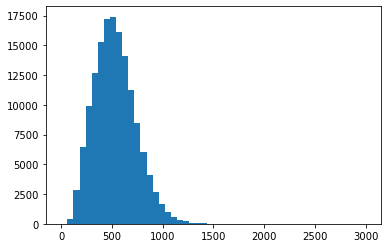

In [8]:
recipes_lengths = []
for recipe_text in dataset_stringified:
    recipes_lengths.append(len(recipe_text))

plt.hist(recipes_lengths, range=(0, 3000), bins=50)
plt.show()

In [9]:
MAX_RECIPE_LENGTH = 800
MIN_RECIPE_LENGTH = 500
def filter_recipes_by_length(recipe_test):
    return (len(recipe_test) <= MAX_RECIPE_LENGTH) and (len(recipe_test) <= MIN_RECIPE_LENGTH)


dataset_filtered = [recipe_text for recipe_text in dataset_stringified if filter_recipes_by_length(recipe_text)]

print('Dataset size BEFORE filtering: ', len(dataset_stringified))
print('Dataset size AFTER filtering: ', len(dataset_filtered))
print('Number of eliminated recipes: ', len(dataset_stringified) - len(dataset_filtered)) 

Dataset size BEFORE filtering:  148914
Dataset size AFTER filtering:  70870
Number of eliminated recipes:  78044


TOKENIZING characters


In [10]:
STOP_SIGN = '␣'

tokenizer = tf.keras.preprocessing.text.Tokenizer(
    char_level=True,
    filters='',
    lower=False,
    split=''
)

# Stop word is not a part of recipes, but tokenizer must know about it as well.
tokenizer.fit_on_texts([STOP_SIGN])

tokenizer.fit_on_texts(dataset_filtered)

tokenizer.get_config()

{'num_words': None,
 'filters': '',
 'lower': False,
 'split': '',
 'char_level': True,
 'oov_token': None,
 'document_count': 70871,
 'word_counts': '{"\\u2423": 1, "\\ud83d\\udcd7": 70870, " ": 3962617, "a": 1525367, "m": 494440, "i": 1316073, "s": 1150989, "h": 590874, "t": 1258516, "o": 1324744, "k": 238071, "e": 2191485, "c": 743787, "u": 587829, "p": 553732, "f": 280121, "r": 1322272, "n": 1282164, "g": 465870, "\\n": 1433596, "\\ud83e\\udd55": 70870, "\\u2022": 468988, "j": 45830, "l": 922242, "d": 727356, "v": 181303, "y": 184725, "\\ud83d\\udcdd": 70870, "\\u25aa": 468518, "\\ufe0e": 468518, "x": 73380, "&": 6095, "b": 376369, "2": 28262, "1": 38876, "/": 9805, "\\"": 11267, "-": 37506, "w": 265636, "!": 6962, "z": 29857, "q": 16701, "8": 6518, "4": 16208, "6": 4618, ":": 2219, "0": 37732, "3": 30746, "5": 34581, "9": 4786, "7": 4544, "@": 229, "%": 432, ".": 185, "^": 19, "~": 114, ")": 409, "(": 97, ",": 376, "?": 50, "\\\\": 60, "=": 56, "#": 63, "`": 31, "[": 60, "]": 55, 

In [11]:
VOCABULARY_SIZE = len(tokenizer.word_counts) + 1

print('VOCABULARY_SIZE: ', VOCABULARY_SIZE)

VOCABULARY_SIZE:  75


In [12]:
print(tokenizer.index_word[5])
print(tokenizer.index_word[20])

o
︎


In [13]:
tokenizer.word_index[' ']

1

In [14]:
array_vocabulary = tokenizer.sequences_to_texts([[word_index] for word_index in range(VOCABULARY_SIZE)])
print([char for char in array_vocabulary])


['', ' ', 'e', 'a', '\n', 'o', 'r', 'i', 'n', 't', 's', 'l', 'c', 'd', 'h', 'u', 'p', 'm', '•', '▪', '︎', 'g', 'b', 'f', 'w', 'k', 'y', 'v', 'x', '📗', '🥕', '📝', 'j', '1', '0', '-', '5', '3', 'z', '2', 'q', '4', '"', '/', '!', '8', '&', '9', '6', '7', ':', '%', ')', ',', '@', '.', '~', '(', '#', '\\', '[', '+', '=', ']', '?', '`', '^', '>', '}', '{', '_', '<', '|', '␣', '$']


In [15]:
tokenizer.texts_to_sequences(['📗 yes'])

[[29, 1, 26, 2, 10]]

Vectorizing 

In [16]:
dataset_vectorized = tokenizer.texts_to_sequences(dataset_filtered)

print('Vectorized dataset size', len(dataset_vectorized)) 

Vectorized dataset size 70870


In [17]:
import re

def recipe_sequence_to_string(recipe_sequence):
    recipe_stringified = tokenizer.sequences_to_texts([recipe_sequence])[0]
    recipe_stringified = re.sub(r'(?<=\S)\s(?=\S)', '', recipe_stringified).replace("   ", " ")
    print(recipe_stringified)
    
recipe_sequence_to_string(dataset_vectorized[0])


📗 amish   tomato ketchup   for canning 
 
 🥕 
 
 • tomato juice 
 • apple cider vinegar 
 • sugar 
 • salt 
 • pepper 
 • clove oil 
 • cinnamon oil 
 • dry mustard 
 
 📝 
 
 ▪︎ mix all ingredients& boil for 2 1 / 2 hours 
 ▪︎ or until thick 
 ▪︎ pour into jars 
 ▪︎ "i useold glass ketchup bottles" 
 ▪︎ "it is not necessary for these toseal" 
 ▪︎ "my amish mother-in-law has been making this her entire life 
 ▪︎ and has never used asealed jar for this recipe 
 ▪︎ and its always been great !" 



In [18]:
for recipe_index, recipe in enumerate(dataset_vectorized[:10]):
    print('Recipe #{} length: {}'.format(recipe_index + 1, len(recipe)))

Recipe #1 length: 457
Recipe #2 length: 223
Recipe #3 length: 345
Recipe #4 length: 218
Recipe #5 length: 464
Recipe #6 length: 443
Recipe #7 length: 434
Recipe #8 length: 370
Recipe #9 length: 269
Recipe #10 length: 457


In [19]:
dataset_vectorized_padded_without_stops = tf.keras.preprocessing.sequence.pad_sequences(
    dataset_vectorized,
    padding='post',
    truncating='post',
    # We use -1 here and +1 in the next step to make sure
    # that all recipes will have at least 1 stops sign at the end,
    # since each sequence will be shifted and truncated afterwards
    # (to generate X and Y sequences).
    maxlen=MAX_RECIPE_LENGTH-1,
    value=tokenizer.texts_to_sequences([STOP_SIGN])[0]
)

dataset_vectorized_padded = tf.keras.preprocessing.sequence.pad_sequences(
    dataset_vectorized_padded_without_stops,
    padding='post',
    truncating='post',
    maxlen=MAX_RECIPE_LENGTH+1,
    value=tokenizer.texts_to_sequences([STOP_SIGN])[0]
)

for recipe_index, recipe in enumerate(dataset_vectorized_padded[:10]):
    print('Recipe #{} length: {}'.format(recipe_index, len(recipe)))

Recipe #0 length: 801
Recipe #1 length: 801
Recipe #2 length: 801
Recipe #3 length: 801
Recipe #4 length: 801
Recipe #5 length: 801
Recipe #6 length: 801
Recipe #7 length: 801
Recipe #8 length: 801
Recipe #9 length: 801


In [20]:
dataset = tf.data.Dataset.from_tensor_slices(dataset_vectorized_padded)

print(dataset)

<TensorSliceDataset shapes: (801,), types: tf.int32>


In [21]:
for recipe in dataset.take(1):
    print('Raw recipe:\n', recipe.numpy(), '\n\n\n')
    print('Stringified recipe:\n')
    recipe_sequence_to_string(recipe.numpy())


Raw recipe:
 [29  1  3 17  7 10 14  1  1  9  5 17  3  9  5  1 25  2  9 12 14 15 16  1
  1 23  5  6  1 12  3  8  8  7  8 21  4  4 30  4  4 18  1  9  5 17  3  9
  5  1 32 15  7 12  2  4 18  1  3 16 16 11  2  1 12  7 13  2  6  1 27  7
  8  2 21  3  6  4 18  1 10 15 21  3  6  4 18  1 10  3 11  9  4 18  1 16
  2 16 16  2  6  4 18  1 12 11  5 27  2  1  5  7 11  4 18  1 12  7  8  8
  3 17  5  8  1  5  7 11  4 18  1 13  6 26  1 17 15 10  9  3  6 13  4  4
 31  4  4 19 20  1 17  7 28  1  3 11 11  1  7  8 21  6  2 13  7  2  8  9
 10 46  1 22  5  7 11  1 23  5  6  1 39  1 33  1 43  1 39  1 14  5 15  6
 10  1  4 19 20  1  5  6  1 15  8  9  7 11  1  9 14  7 12 25  4 19 20  1
 16  5 15  6  1  7  8  9  5  1 32  3  6 10  4 19 20  1 42  7  1 15 10  2
  5 11 13  1 21 11  3 10 10  1 25  2  9 12 14 15 16  1 22  5  9  9 11  2
 10 42  4 19 20  1 42  7  9  1  7 10  1  8  5  9  1  8  2 12  2 10 10  3
  6 26  1 23  5  6  1  9 14  2 10  2  1  9  5 10  2  3 11 42  4 19 20  1
 42 17 26  1  3 17  7 10 14  1 17  5  

In [22]:
def split_input_target(recipe):
    input_text = recipe[:-1]
    target_text = recipe[1:]
    
    return input_text, target_text

dataset_targeted = dataset.map(split_input_target)

print(dataset_targeted)

<MapDataset shapes: ((800,), (800,)), types: (tf.int32, tf.int32)>


In [23]:
for input_example, target_example in dataset_targeted.take(1):
    print('Input sequence size:', repr(len(input_example.numpy())))
    print('Target sequence size:', repr(len(target_example.numpy())))
    print()
    
    input_stringified = tokenizer.sequences_to_texts([input_example.numpy()[:50]])[0]
    target_stringified = tokenizer.sequences_to_texts([target_example.numpy()[:50]])[0]
    
    print('Input:  ', repr(''.join(input_stringified)))
    print('Target: ', repr(''.join(target_stringified))) 


Input sequence size: 800
Target sequence size: 800

Input:   '📗   a m i s h     t o m a t o   k e t c h u p     f o r   c a n n i n g \n \n 🥕 \n \n •   t o m a t o  '
Target:  '  a m i s h     t o m a t o   k e t c h u p     f o r   c a n n i n g \n \n 🥕 \n \n •   t o m a t o   j'


In [24]:
for i, (input_idx, target_idx) in enumerate(zip(input_example[:10], target_example[:10])):
    print('Step {:2d}'.format(i + 1))
    print('  input: {} ({:s})'.format(input_idx, repr(tokenizer.sequences_to_texts([[input_idx.numpy()]])[0])))
    print('  expected output: {} ({:s})'.format(target_idx, repr(tokenizer.sequences_to_texts([[target_idx.numpy()]])[0])))


Step  1
  input: 29 ('📗')
  expected output: 1 (' ')
Step  2
  input: 1 (' ')
  expected output: 3 ('a')
Step  3
  input: 3 ('a')
  expected output: 17 ('m')
Step  4
  input: 17 ('m')
  expected output: 7 ('i')
Step  5
  input: 7 ('i')
  expected output: 10 ('s')
Step  6
  input: 10 ('s')
  expected output: 14 ('h')
Step  7
  input: 14 ('h')
  expected output: 1 (' ')
Step  8
  input: 1 (' ')
  expected output: 1 (' ')
Step  9
  input: 1 (' ')
  expected output: 9 ('t')
Step 10
  input: 9 ('t')
  expected output: 5 ('o')


In [25]:
# Batch size.
BATCH_SIZE = 64

# Buffer size to shuffle the dataset (TF data is designed to work
# with possibly infinite sequences, so it doesn't attempt to shuffle
# the entire sequence in memory. Instead, it maintains a buffer in
# which it shuffles elements).
SHUFFLE_BUFFER_SIZE = 1000

dataset_train = dataset_targeted.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True).repeat()

print(dataset_train)

<RepeatDataset shapes: ((64, 800), (64, 800)), types: (tf.int32, tf.int32)>


In [26]:
for input_text, target_text in dataset_train.take(1):
    print('1st batch: input_text:', input_text)
    print()
    print('1st batch: target_text:', target_text)

1st batch: input_text: tf.Tensor(
[[29  1 36 ... 73 73 73]
 [29  1  3 ... 73 73 73]
 [29  1  3 ... 73 73 73]
 ...
 [29  1  3 ... 73 73 73]
 [29  1  3 ... 73 73 73]
 [29  1 33 ... 73 73 73]], shape=(64, 800), dtype=int32)

1st batch: target_text: tf.Tensor(
[[ 1 36  1 ... 73 73 73]
 [ 1  3  1 ... 73 73 73]
 [ 1  3 12 ... 73 73 73]
 ...
 [ 1  3 21 ... 73 73 73]
 [ 1  3 22 ... 73 73 73]
 [ 1 33 47 ... 73 73 73]], shape=(64, 800), dtype=int32)


In [27]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        batch_input_shape=[batch_size, None]
    ))

    model.add(tf.keras.layers.LSTM(
        units=rnn_units,
        return_sequences=True,
        stateful=True,
        recurrent_initializer=tf.keras.initializers.GlorotNormal()
    ))

    model.add(tf.keras.layers.Dense(vocab_size))
    
    return model

model = build_model(
  vocab_size=VOCABULARY_SIZE,
  embedding_dim=256,
  rnn_units=1024,
  batch_size=BATCH_SIZE
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (64, None, 256)           19200     
_________________________________________________________________
lstm (LSTM)                  (64, None, 1024)          5246976   
_________________________________________________________________
dense (Dense)                (64, None, 75)            76875     
Total params: 5,343,051
Trainable params: 5,343,051
Non-trainable params: 0
_________________________________________________________________


In [28]:
for input_example_batch, target_example_batch in dataset_train.take(1):
    example_batch_predictions = model(input_example_batch)
    print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")


(64, 800, 75) # (batch_size, sequence_length, vocab_size)


In [29]:
sampled_indices = tf.random.categorical(
    logits=example_batch_predictions[0],
    num_samples=1
)

sampled_indices = tf.squeeze(
    input=sampled_indices,
    axis=-1
).numpy()

sampled_indices.shape

(800,)

In [30]:
print('Input:\n', repr(''.join(tokenizer.sequences_to_texts([input_example_batch[0].numpy()[:50]]))))
print()
print('Next char prediction:\n', repr(''.join(tokenizer.sequences_to_texts([sampled_indices[:50]])))) 

Input:
 '📗   a     m o l a s s e s   g i n g e r   s n a p s \n \n 🥕 \n \n •   m o l a s s e s \n •   s u g a r \n'

Next char prediction:
 'i 7 / - ` x g ? m \n • 9 d 6 < . # | g x z q k 6 4 w @ . t 9 & ~ j , d e ( x # ( b { 5 % = ( x ^ 1 ,'


In [31]:
# An objective function.
# The function is any callable with the signature scalar_loss = fn(y_true, y_pred).
def loss(labels, logits):
    entropy = tf.keras.losses.sparse_categorical_crossentropy(
      y_true=labels,
      y_pred=logits,
      from_logits=True
    )
    
    return entropy

example_batch_loss = loss(target_example_batch, example_batch_predictions)

print("Prediction shape: ", example_batch_predictions.shape, " # (batch_size, sequence_length, vocab_size)")
print("scalar_loss.shape:      ", example_batch_loss.shape)
print("scalar_loss:      ", example_batch_loss.numpy().mean()) 

Prediction shape:  (64, 800, 75)  # (batch_size, sequence_length, vocab_size)
scalar_loss.shape:       (64, 800)
scalar_loss:       4.3199916


In [32]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=loss
)


In [33]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    patience=5,
    monitor='loss',
    restore_best_weights=True,
    verbose=1
)

# Create a checkpoints directory.
checkpoint_dir = 'tmp/checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt_{epoch}')
checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True
)

In [ ]:
EPOCHS = 50
INITIAL_EPOCH = 1
STEPS_PER_EPOCH = 500

history = model.fit(
    x=dataset_train,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    initial_epoch=INITIAL_EPOCH,
    callbacks=[
        checkpoint_callback,
        early_stopping_callback
    ]
)

# Saving the trained model to file (to be able to re-use it later).
model_name = 'recipe_generation_rnn_raw.h5'
model.save(model_name, save_format='h5')

Epoch 2/50
500/500 [==============================] - 19754s 40s/step - loss: 1.2719
Epoch 3/50
500/500 [==============================] - 22606s 45s/step - loss: 0.4952
Epoch 4/50
500/500 [==============================] - 23272s 47s/step - loss: 0.3767
Epoch 5/50
500/500 [==============================] - 24756s 50s/step - loss: 0.3402
Epoch 6/50
500/500 [==============================] - 26302s 53s/step - loss: 0.3143
Epoch 7/50
480/500 [===========================>..] - ETA: 17:53 - loss: 0.2979

In [ ]:
def render_training_history(training_history):
    loss = training_history.history['loss']

    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)
    plt.show()

render_training_history(history)


In [ ]:
tf.train.latest_checkpoint("tmp/checkpoints")


In [ ]:
simplified_batch_size = 1

model_simplified = build_model(vocab_size=VOCABULARY_SIZE,
  embedding_dim=256,
  rnn_units=1024,
  batch_size=simplified_batch_size)
model_simplified.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
model_simplified.build(tf.TensorShape([simplified_batch_size, None]))

model_simplified.summary()

In [ ]:
model_simplified.input_shape

In [ ]:
def generate_text(model, start_string, num_generate = 1000, temperature=1.0):
    # Evaluation step (generating text using the learned model)
    
    padded_start_string = STOP_WORD_TITLE + start_string

    # Converting our start string to numbers (vectorizing).
    input_indices = np.array(tokenizer.texts_to_sequences([padded_start_string]))

    # Empty string to store our results.
    text_generated = []

    # Here batch size == 1.
    model.reset_states()
    for char_index in range(num_generate):
        predictions = model(input_indices)
        # remove the batch dimension
        predictions = tf.squeeze(predictions, 0)

        # Using a categorical distribution to predict the character returned by the model.
        predictions = predictions / temperature
        predicted_id = tf.random.categorical(
            predictions,
            num_samples=1
        )[-1, 0].numpy()

        # We pass the predicted character as the next input to the model
        # along with the previous hidden state.
        input_indices = tf.expand_dims([predicted_id], 0)
        
        next_character = tokenizer.sequences_to_texts(input_indices.numpy())[0]

        text_generated.append(next_character)

    return (padded_start_string + ''.join(text_generated))

In [ ]:
def generate_combinations(model):
    recipe_length = 1000
    try_letters = [ 'A', 'B', 'boneless chicken breasts']
    try_temperature = [1.0, 0.8, 0.4, 0.2]

    for letter in try_letters:
        for temperature in try_temperature:
            generated_text = generate_text(
                model,
                start_string=letter,
                num_generate = recipe_length,
                temperature=temperature
            )
            print(f'Attempt: "{letter}" + {temperature}')
            print('-----------------------------------')
            print(generated_text)
            print('\n\n')

In [ ]:
generate_combinations(model_simplified)